# Board Game Review Prediction

**Reviews can make or break a product; as a result, many companies take drastic measures to ensure that their product receives good reviews.  When it comes to board games, reviews and word-of-mouth are everything. In this project, we will be using a linear regression model to predict the average review a board game will receive based on characteristics such as minimum and maximum number of players, playing time, complexity, etc.**

### Importing libraries and Loading Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('coolwarm')
sns.set_style('whitegrid')

In [13]:
# Read in the Data as a DataFrame 'games' and Printing the columns in games
games=pd.read_csv('games.csv')
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

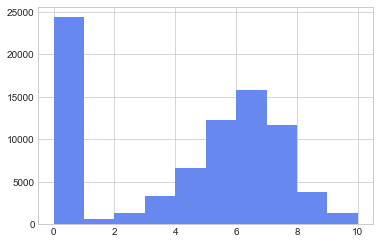

In [14]:
# Histogram of all the ratings in the average_rating column.
plt.hist(games['average_rating'])

As can be observed from the above histogram, a majority of the games in the dataframe are given an average rating of zero. These rows need to be closely observe to determine the reason for the zero rating.

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
****************************
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                        

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

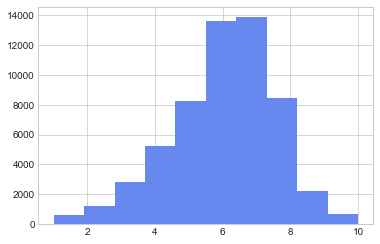

In [15]:
# Printing the first row of all the games with zero scores and scores greater than 0.
print(games[games['average_rating']==0].iloc[0])
print('****************************')
print(games[games['average_rating']>0].iloc[0])

# Removing rows without user reviews.
games=games[games['users_rated']>0]
# Droping rows with missing values.
games=games.dropna(axis=0)

# Histogram of all the ratings in the average_rating column.
plt.hist(games['average_rating'])

In order to know if there are any strong correlations prevalent in the dataset, correlation matrix has been plotted as follows

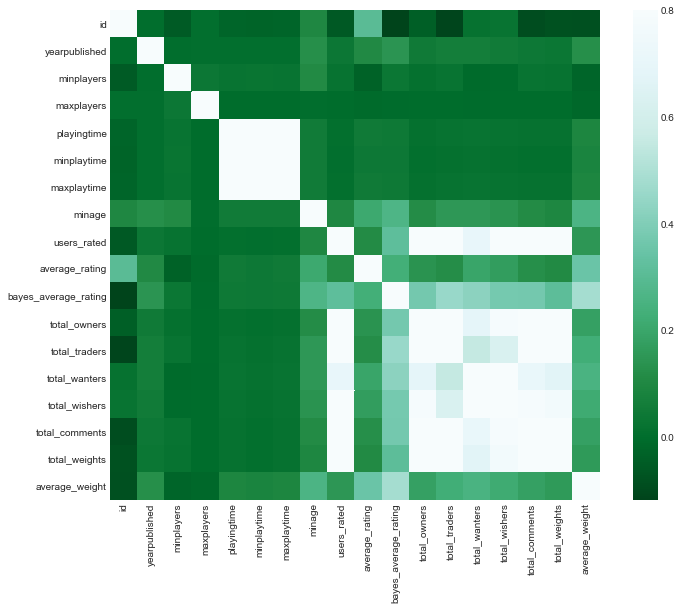

In [16]:
# Correlation Matrix
gameCorr=games.corr()
# Heatmap
fig=plt.figure(figsize=(12,9))
sns.heatmap(gameCorr,vmax=.8,square=True,cmap='BuGn_r')

From the correlation matrix the correlation between values of different columns could be established. It can be seen that if the square colour is lighter (towards white), the columns were highly correlated and darker implies no correlation. Moreover, columns which are collinear showed maximum correlation value like the 'playingtime', 'minplaytime' and 'maxplaytime' and 'average_rating' and 'bayes_average_rating' Further, some of the columns like 'type', 'name' and 'yearpublished' could be removed rightaway as they provide negligible information pertaining to the predictor 'average_rating'. Lastly, columns such as 'id' and 'bayes_average_rating' must be removed as the high correlation with the average_rating and collinearity respectively would adversely affect the machine learning model.

In [17]:
# Get all the columns from the dataframe.
columns=games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns=[c for c in columns if c not in['bayes_average_rating', 'average_rating', 'type', 'name', 'id']]
# Store the variable we'll be predicting on.
target='average_rating'

### Linear Regression
Here we will deploy a simple linear regression model to predict the average review of each board game.  We will use the mean squared error as a performance metric.  Furthermore, we will compare and contrast these results with the performance of an ensemble method. 

In [114]:
# Importing the convenience function to split the sets.
from sklearn.model_selection import train_test_split
# Generating the training set.
train=games.sample(frac=0.77,random_state=1)
# Select anything not in the training set and put it in the testing set.
test=games.loc[~games.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(43808, 20)
(13086, 20)


In [115]:
# Importing the linear regression model and Mean Squared Error.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initializing the model class.
lr_model=LinearRegression()

# Fitting the model to the training data.
lr_model.fit(train[columns],train[target])

# Generate our predictions for the test set.
predictions=lr_model.predict(test[columns])

# Compute error between our test predictions and the actual values.
print(mean_squared_error(predictions,test[target]))


2.089008256579406


### Random Forest Regression

In [116]:
# Importing the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialization with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

# Fitting the model to the data.
model.fit(train[columns], train[target])

# Generating our predictions.
predictions = model.predict(test[columns])

# Compute the error.
mean_squared_error(predictions, test[target])

1.4568197152820233

Mean Squared Error for **Linear Regression** Model is 2.089008256579406 

Mean Squared Error for **Random Forest Regression** Model is 1.4568197152820233

### _Thus, it can be observed that the Random Forest Regression model has a much lower mean squared error compared to the linear regression model. This could be attributed to the non linear spread of the features with respect to the label._

